In [31]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from csv import writer
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt 

## 1.Data Extraction

In [2]:
url= requests.get("https://www.jumia.co.ke/smartphones/?shipped_from=country_local#catalog-listing").text
soup=BeautifulSoup(url,'lxml')
item_list = soup.find_all('article',class_="prd _fb col c-prd",)

#item_list

for item in item_list:
    Productname= item.find('h3',class_='name')
    Price = item.find('div',class_='prc')
    print(Productname)
    print(Price)
  


<h3 class="name">Infinix Smart 6, 6.6", 2GB RAM, 32GB, 5000mAh,Polar Black</h3>
<div class="prc">KSh 10,299</div>
<h3 class="name">Tecno Pop 6 6.1", 2GB RAM+32GB, 8MP, 4G (Dual Sim) 5000MAh -Lime Green</h3>
<div class="prc">KSh 8,819</div>
<h3 class="name">XIAOMI Redmi 9A, 6.53", 2GB+32GB, 13.0MP, 5000mAh, 4G LTE, Dual SIM - Grey</h3>
<div class="prc">KSh 11,499</div>
<h3 class="name">Oppo A83 64GB + 4GB RAM - 4G LTE Dual SIM -  5.7-inch,Red</h3>
<div class="prc">KSh 9,990</div>
<h3 class="name">XIAOMI Redmi 10A, 6.53", 3GB+64GB, 13.0MP, 5000mAh, 4G LTE, Dual SIM - Graphite Grey</h3>
<div class="prc">KSh 14,799</div>
<h3 class="name">XIAOMI Redmi 10C, 6.53'', [4GB RAM + 64GB], 4G, DUAL SIM + 8 FREE GIFTS</h3>
<div class="prc">KSh 17,499</div>
<h3 class="name">Infinix Smart 6, 6.6", 32GB + 2GB RAM (Dual SIM), 5000mAh, Quartz Cyan</h3>
<div class="prc">KSh 10,695</div>
<h3 class="name">XIAOMI Redmi 10 6.5'' Inches 4+128GB 50MP Rear Camera 4G Smartphone - Grey</h3>
<div class="prc">KSh 18

In [28]:
#To remove the html tags
all_items=[]

for item in item_list:
    Productname= item.find('h3',class_='name')
    Price = item.find('div',class_='prc')
    
    print(Productname.text.strip())
    print(Price.text.strip())
    all_items.append((Productname.text.strip(),Price.text.strip()))

Infinix Smart 6, 6.6", 2GB RAM, 32GB, 5000mAh,Polar Black
KSh 10,299
Tecno Pop 6 6.1", 2GB RAM+32GB, 8MP, 4G (Dual Sim) 5000MAh -Lime Green
KSh 8,819
XIAOMI Redmi 9A, 6.53", 2GB+32GB, 13.0MP, 5000mAh, 4G LTE, Dual SIM - Grey
KSh 11,499
Oppo A83 64GB + 4GB RAM - 4G LTE Dual SIM -  5.7-inch,Red
KSh 9,990
XIAOMI Redmi 10A, 6.53", 3GB+64GB, 13.0MP, 5000mAh, 4G LTE, Dual SIM - Graphite Grey
KSh 14,799
XIAOMI Redmi 10C, 6.53'', [4GB RAM + 64GB], 4G, DUAL SIM + 8 FREE GIFTS
KSh 17,499
Infinix Smart 6, 6.6", 32GB + 2GB RAM (Dual SIM), 5000mAh, Quartz Cyan
KSh 10,695
XIAOMI Redmi 10 6.5'' Inches 4+128GB 50MP Rear Camera 4G Smartphone - Grey
KSh 18,799
Samsung Galaxy A13, 6.6", 64GB + 4GB RAM (Dual SIM), 5000mAh, Black
KSh 19,299
Oppo A16k, 6.52", 32GB + 3GB RAM (Dual SIM), 4230mAh - Blue
KSh 14,278
Samsung Galaxy A13, 6.6", 128GB + 4GB RAM (Dual SIM), 5000mAh, Blue
KSh 21,699
Tecno Pova Neo, 6.8", 64GB+ 4GB (Dual SIM),4G LTE, 6000mAh, Obsidian Black
KSh 15,999
Samsung Galaxy A13, 6.6", 64GB + 4

In [4]:
#To put the data in a dataframe
df = pd.DataFrame(all_items)
df.columns = ["name", "price"]
df.to_csv('jumia_dataframe.csv')

## 2.Data Assesment

In [5]:
df.head()

,name,price
0,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...","KSh 10,299"
1,"Tecno Pop 6 6.1"", 2GB RAM+32GB, 8MP, 4G (Dual ...","KSh 8,819"
2,"XIAOMI Redmi 9A, 6.53"", 2GB+32GB, 13.0MP, 5000...","KSh 11,499"
3,Oppo A83 64GB + 4GB RAM - 4G LTE Dual SIM - 5...,"KSh 9,990"
4,"XIAOMI Redmi 10A, 6.53"", 3GB+64GB, 13.0MP, 500...","KSh 14,799"


In [6]:
df.tail()

,name,price
35,"Samsung Galaxy A03, 6.5"", 64GB + 4GB RAM (Dual...","KSh 15,299"
36,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, Android ...","KSh 10,695"
37,"Tecno Spark 8C, 6.6"", 64GB + 2GB RAM (Dual SIM...","KSh 12,999"
38,"Itel A58 Lite, 6.3"", 32GB + 2GB RAM (Dual SIM)...","KSh 8,255"
39,"Ulefone Note 6, 6.1"", 32GB + 1GB RAM (Dual SIM...","KSh 7,599"


In [7]:
df.isna().sum()


name     0
price    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    40 non-null     object
 1   price   40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


In [9]:
df.duplicated().sum()

0

## 3.Data Cleaning

1.To remove the 'ksh'symbol in the price column and to change the datatype to integer

In [10]:
df['price'] = df['price'].str[3:] 
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int)
df['price'].dtype

dtype('int32')

In [11]:
df['price'].tail()

35    15299
36    10695
37    12999
38     8255
39     7599
Name: price, dtype: int32

## 4.Feature Extraction

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Function to extract brand name

In [13]:

product_brands=['infinix','xiaomi','oppo','tecno','samsung','nokia','itel','ulefone']

def getbrand(name):
    name = name.lower()
    word_tokens= word_tokenize(name)
    brand = [char for char in word_tokens if char in product_brands]
    return ''.join(brand)

In [14]:
df['brand']=df['name'].apply(getbrand)

In [53]:
df.sample(10)

,name,price,brand,ram,storage,sim
31,"Infinix Smart 6, 6.6"", 32GB 2GB RAM (Dual SI...",11100,infinix,2,32,dual
6,"Infinix Smart 6, 6.6"", 32GB 2GB RAM (Dual SI...",10695,infinix,2,32,dual
19,"Samsung Galaxy A03 Core, 6.5"" 32GB 2G, 5000m...",11699,samsung,,32,dual
9,"Oppo A16k, 6.52"", 32GB 3GB RAM (Dual SIM), 4...",14278,oppo,3,32,dual
37,"Tecno Spark 8C, 6.6"", 64GB 2GB RAM (Dual SIM...",12999,tecno,2,64,dual
21,"Tecno CAMON 19, 6.8"", 128GB 4GB (Dual SIM), (...",22499,tecno,4,128,dual
32,"Samsung Galaxy A13, 6.6"", 128GB 4GB (Dual SI...",22997,samsung,4,128,dual
18,"XIAOMI Redmi 9C 6.53'', 4GB 128GB, 13MP 2MP 2M...",16299,xiaomi,4,128,dual
5,"XIAOMI Redmi 10C, 6.53'', [4GB RAM 64GB], 4G...",17499,xiaomi,4,64,dual
16,"Nokia C1 2nd Edition, 5.45"", 1GB 16GB - (DUAL...",7139,nokia,1,16,dual


Function to extract RAM


In [16]:
 df['name']=df['name'].str.replace('+',' ',regex=True)

In [17]:

ram_type=['1gb','2gb','3gb','4gb','2g']

def getram(name):
    name = name.lower()
    word_tokens= word_tokenize(name)
    ram = [char for char in word_tokens if char in ram_type]
    return ''.join(ram)
df['ram'] = df['name'].apply(getram)
df['ram'] = df['ram'].str[:-2]
df.sample(10)

,name,price,brand,ram
21,"Tecno CAMON 19, 6.8"", 128GB 4GB (Dual SIM), (...",22499,tecno,4
22,"Tecno CAMON 19, 6.8"", 128GB 4GB (Dual SIM), (...",22846,tecno,4
2,"XIAOMI Redmi 9A, 6.53"", 2GB 32GB, 13.0MP, 5000...",11499,xiaomi,2
39,"Ulefone Note 6, 6.1"", 32GB 1GB RAM (Dual SIM...",7599,ulefone,1
30,"XIAOMI Redmi 9A 6.53"", 2GB RAM 32GB, 5000mAh, ...",11499,xiaomi,2
23,"Samsung Galaxy A03, 6.5"", 64GB 4GB RAM (Dual...",15299,samsung,4
24,"XIAOMI Redmi 9C 6.53'', 4GB 128GB, 13MP 2MP 2M...",16499,xiaomi,4
10,"Samsung Galaxy A13, 6.6"", 128GB 4GB RAM (Dua...",21699,samsung,4
38,"Itel A58 Lite, 6.3"", 32GB 2GB RAM (Dual SIM)...",8255,itel,2
13,"Itel A14 Plus, 4"", 8GB 1GB RAM, 2500mAh - Blue",4443,itel,1


In [18]:
phone_storage=['8gb','16gb','32gb','64gb','128gb']

def getstorage(name):
    name = name.lower()
    word_tokens= word_tokenize(name)
    storage = [char for char in word_tokens if char in phone_storage]
    return ''.join(storage)
df['storage'] = df['name'].apply(getstorage)
df['storage'] = df['storage'].str[:-2]

df.sample(5)

,name,price,brand,ram,storage
17,Oppo A83 64GB 4GB RAM - 4G LTE Dual SIM - 5...,9790,oppo,4,64
5,"XIAOMI Redmi 10C, 6.53'', [4GB RAM 64GB], 4G...",17499,xiaomi,4,64
13,"Itel A14 Plus, 4"", 8GB 1GB RAM, 2500mAh - Blue",4443,itel,1,8
14,"Samsung Galaxy A13, 6.6"", 128GB 4GB RAM (Dua...",21699,samsung,4,128
21,"Tecno CAMON 19, 6.8"", 128GB 4GB (Dual SIM), (...",22499,tecno,4,128


In [19]:
df['name']=df['name'].str.replace('()','')
df.sample(5)

C:\Users\kibe\AppData\Local\Temp\ipykernel_11960\2808237981.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name']=df['name'].str.replace('()','')


,name,price,brand,ram,storage
33,"Itel A33 Plus,,5.0"" Screen Display(16GB 1GB),F...",6160,itel,1,16
16,"Nokia C1 2nd Edition, 5.45"", 1GB 16GB - (DUAL...",7139,nokia,1,16
32,"Samsung Galaxy A13, 6.6"", 128GB 4GB (Dual SI...",22997,samsung,4,128
19,"Samsung Galaxy A03 Core, 6.5"" 32GB 2G, 5000m...",11699,samsung,,32
4,"XIAOMI Redmi 10A, 6.53"", 3GB 64GB, 13.0MP, 500...",14799,xiaomi,3,64


In [21]:
sim_type=['dual']

def getsim(name):
    name = name.lower()
    word_tokens= word_tokenize(name)
    sim = [char for char in word_tokens if char in sim_type]
    return ''.join(sim)
df['sim'] = df['name'].apply(getsim)

df

,name,price,brand,ram,storage,sim
0,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...",10299,infinix,2,32,
1,"Tecno Pop 6 6.1"", 2GB RAM 32GB, 8MP, 4G (Dual ...",8819,tecno,2,32,dual
2,"XIAOMI Redmi 9A, 6.53"", 2GB 32GB, 13.0MP, 5000...",11499,xiaomi,2,32,dual
3,Oppo A83 64GB 4GB RAM - 4G LTE Dual SIM - 5...,9990,oppo,4,64,dual
4,"XIAOMI Redmi 10A, 6.53"", 3GB 64GB, 13.0MP, 500...",14799,xiaomi,3,64,dual
5,"XIAOMI Redmi 10C, 6.53'', [4GB RAM 64GB], 4G...",17499,xiaomi,4,64,dual
6,"Infinix Smart 6, 6.6"", 32GB 2GB RAM (Dual SI...",10695,infinix,2,32,dual
7,XIAOMI Redmi 10 6.5'' Inches 4 128GB 50MP Rear...,18799,xiaomi,,128,
8,"Samsung Galaxy A13, 6.6"", 64GB 4GB RAM (Dual...",19299,samsung,4,64,dual
9,"Oppo A16k, 6.52"", 32GB 3GB RAM (Dual SIM), 4...",14278,oppo,3,32,dual


## Data Visualization


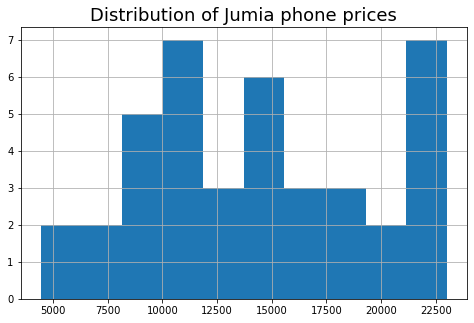

In [35]:
#Distribution of prices in our dataset
df['price'].hist(figsize=(8,5))
plt.title('Distribution of Jumia phone prices', fontsize=18)

plt.show()

In [37]:
#most expensive mobile phones in our dataset
most_expensive_phones = df[['name', 'price']].sort_values('price', ascending=False).head(10)
most_expensive_phones = most_expensive_phones.reset_index(drop=True)
most_expensive_phones

,name,price
0,"Samsung Galaxy A13, 6.6"", 128GB 4GB (Dual SI...",22997
1,"Tecno CAMON 19, 6.8"", 128GB 4GB (Dual SIM), (...",22846
2,"Tecno CAMON 19, 6.8"", 128GB 4GB (Dual SIM), (...",22568
3,"Tecno CAMON 19, 6.8"", 128GB 4GB (Dual SIM), (...",22499
4,"Samsung Galaxy A23, 6.6″, 64GB 4GB RAM (Dual...",22499
5,"Samsung Galaxy A13, 6.6"", 128GB 4GB RAM (Dua...",21699
6,"Samsung Galaxy A13, 6.6"", 128GB 4GB RAM (Dua...",21699
7,"Samsung Galaxy A13, 6.6"", 64GB 4GB RAM (Dual...",19299
8,"Samsung Galaxy A13, 6.6"", 64GB 4GB RAM (Dual...",19299
9,"XIAOMI Redmi 10C 6.71'', 4GB 128GB, 50MP 2MP C...",19099


In [38]:
#least expensive 
least_expensive_phones = df[['name', 'price']].sort_values('price', ascending=True).head(10)
least_expensive_phones = least_expensive_phones.reset_index(drop=True)
least_expensive_phones

,name,price
0,"Itel A14 Plus, 4"", 8GB 1GB RAM, 2500mAh - Blue",4443
1,"Itel A33 Plus,,5.0"" Screen Display(16GB 1GB),F...",6160
2,"Nokia C1 2nd Edition, 5.45"", 1GB 16GB - (DUAL...",7139
3,"Ulefone Note 6, 6.1"", 32GB 1GB RAM (Dual SIM...",7599
4,"Itel A58 Lite, 6.3"", 32GB 2GB RAM (Dual SIM)...",8255
5,"Tecno Pop 6 6.1"", 2GB RAM 32GB, 8MP, 4G (Dual ...",8819
6,"Tecno Pop 6 GO, 6"", 32GB 2GB RAM ,(Dual SIM)...",9445
7,Oppo A83 64GB 4GB RAM - 4G LTE Dual SIM - 5...,9790
8,Oppo A83 64GB 4GB RAM - 4G LTE Dual SIM - 5...,9990
9,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...",10299


In [55]:
sim_type_distribution = df['sim'].value_counts()
sim_type_distribution
avg_sim_distr= df.groupby('brand')(sim_type_distribution).mean().to_frame()
avg_sim_distr.sort_values('', ascending=False, inplace=True)
#avg_brand_pricef.groupby('brand')['price'].mean().to_frame()
#avg_brand_price.sort_values('price', ascending=False, inplace=True)
avg_sim_distr

TypeError: 'DataFrameGroupBy' object is not callable

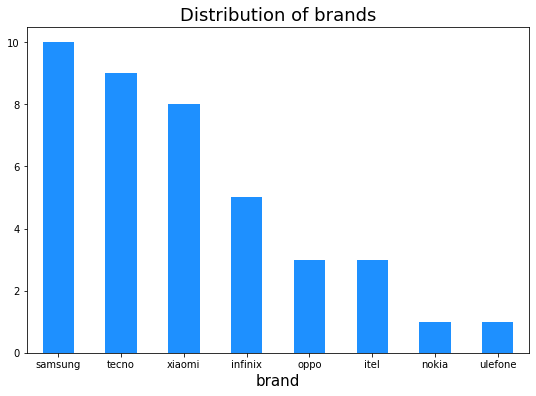

In [41]:
#distribution of brands
brand_distribution = df['brand'].value_counts()

plt.figure(figsize = (9,6))
brand_distribution.plot.bar(color='dodgerblue')
plt.title('Distribution of brands', fontsize=18)
plt.xlabel('brand', fontsize=15)
plt.xticks(rotation=0)
plt.show()


<Figure size 720x432 with 0 Axes>

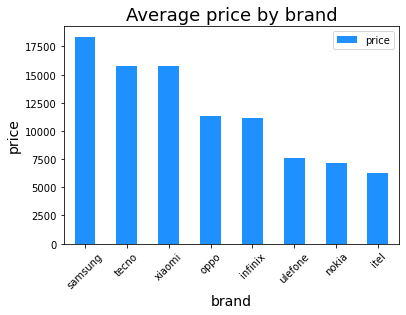

In [45]:
#average brand price
avg_brand_price = df.groupby('brand')['price'].mean().to_frame()
avg_brand_price.sort_values('price', ascending=False, inplace=True)
avg_brand_price

plt.figure(figsize = (10,6))
avg_brand_price.plot.bar(color='dodgerblue')
plt.title('Average price by brand', fontsize=18)
plt.xlabel('brand', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

In [48]:

avg_ram_price = df.groupby('ram')['price'].mean().to_frame()
avg_ram_price.sort_values('price', ascending=False, inplace=True)
avg_ram_price.drop('', inplace=True)
avg_ram_price

,price
ram,
4,18398.777778
3,14355.666667
2,11169.000000
1,6335.250000


In [51]:
br = df.groupby('brand')
br.first()

,name,price,ram,storage,sim
brand,,,,,
infinix,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...",10299,2,32,
itel,"Itel A14 Plus, 4"", 8GB 1GB RAM, 2500mAh - Blue",4443,1,8,
nokia,"Nokia C1 2nd Edition, 5.45"", 1GB 16GB - (DUAL...",7139,1,16,dual
oppo,Oppo A83 64GB 4GB RAM - 4G LTE Dual SIM - 5...,9990,4,64,dual
samsung,"Samsung Galaxy A13, 6.6"", 64GB 4GB RAM (Dual...",19299,4,64,dual
tecno,"Tecno Pop 6 6.1"", 2GB RAM 32GB, 8MP, 4G (Dual ...",8819,2,32,dual
ulefone,"Ulefone Note 6, 6.1"", 32GB 1GB RAM (Dual SIM...",7599,1,32,dual
xiaomi,"XIAOMI Redmi 9A, 6.53"", 2GB 32GB, 13.0MP, 5000...",11499,2,32,dual


In [52]:
br.get_group('infinix')

,name,price,brand,ram,storage,sim
0,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, 5000mAh,...",10299,infinix,2,32,
6,"Infinix Smart 6, 6.6"", 32GB 2GB RAM (Dual SI...",10695,infinix,2,32,dual
25,"Infinix HOT 12i, 6.6''{ 64GB 2GB Expandable To...",12995,infinix,2,64,dual
31,"Infinix Smart 6, 6.6"", 32GB 2GB RAM (Dual SI...",11100,infinix,2,32,dual
36,"Infinix Smart 6, 6.6"", 2GB RAM, 32GB, Android ...",10695,infinix,2,32,
